Model development and residual calculation

--2023-12-24 04:04:42--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   195KB/s    in 0.4s    

2023-12-24 04:04:43 (195 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



<ipython-input-36-a34880e0cff7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X ['FUELCONSUMPTION_COMB_MPG_2']= X['FUELCONSUMPTION_COMB_MPG']**2
<ipython-input-36-a34880e0cff7>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X ['FUELCONSUMPTION_COMB_MPG_2']= np.log(X['FUELCONSUMPTION_COMB_MPG'])


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB_MPG,FUELCONSUMPTION_COMB_MPG_2
0,2.0,4,33,3.496508
1,2.4,4,29,3.367296
2,1.5,4,48,3.871201
3,3.5,6,25,3.218876
4,3.5,6,27,3.295837


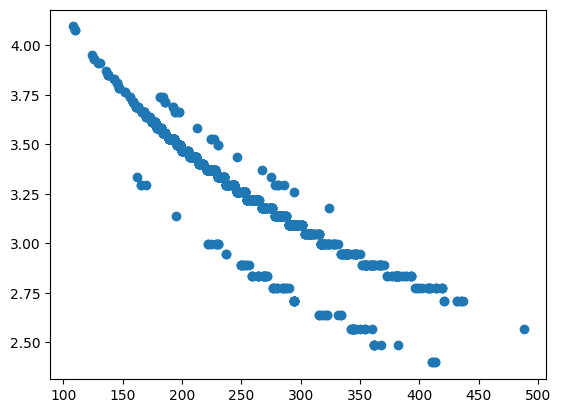

In [36]:
# Book Figure 11-1

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import numpy as np


!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
df = pd.read_csv("FuelConsumption.csv")
X = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB_MPG']]
# X ['FUELCONSUMPTION_COMB_MPG_2']= X['FUELCONSUMPTION_COMB_MPG']**2
# X ['FUELCONSUMPTION_COMB_MPG_2']= np.log(X['FUELCONSUMPTION_COMB_MPG'])

y = df[['CO2EMISSIONS']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
model=LinearRegression()
model.fit(X_train,y_train)
LinearRegression()
y_pred=model.predict(X_test)
residual =y_test-y_pred
plt.scatter(y,X['FUELCONSUMPTION_COMB_MPG_2'])

X.head()

Model paramters and metrics

In [28]:
from sklearn.metrics import r2_score

print ('Slope: ', model.coef_)
print ('Intercept: ',model.intercept_)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test-y_pred)))
print("Mean sum of squares (MSE): %.2f" % np.mean((y_test-y_pred) ** 2))
print("R2-score: %.2f" % r2_score(y_test,y_pred) )

Slope:  [[ 8.16556271  6.05486294 -8.88966388  0.06249993]]
Intercept:  [381.65588041]
Mean absolute error: 11.28
Mean sum of squares (MSE): 335.39
R2-score: 0.91


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


t and p values

In [29]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     1622.
Date:                Sun, 24 Dec 2023   Prob (F-statistic):               0.00
Time:                        04:00:04   Log-Likelihood:                -3836.6
No. Observations:                 853   AIC:                             7683.
Df Residuals:                     848   BIC:                             7707.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Residual Mean

In [ ]:
plt.scatter(y_pred, residual)
plt.xlabel('y_pred')
plt.ylabel('residual')
print('Resdiual Mean:',np.mean(residual))

Residual vs IVs

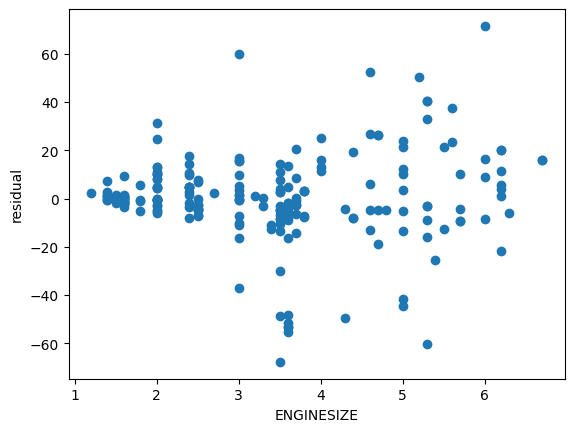

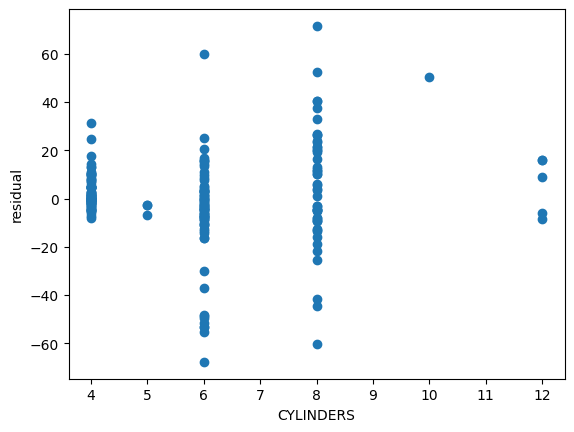

Text(0, 0.5, 'residual')

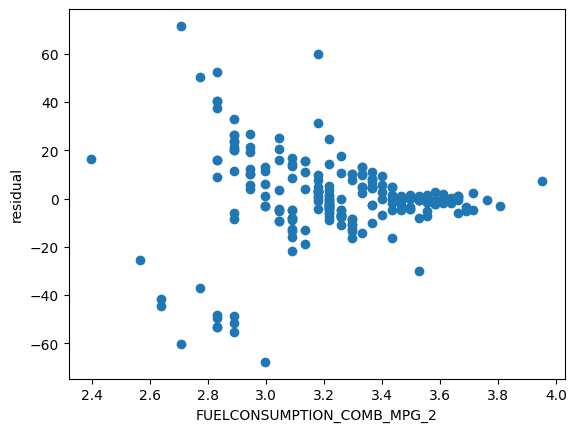

In [35]:
plt.scatter(X_test.ENGINESIZE, residual)
plt.xlabel('ENGINESIZE')
plt.ylabel('residual')
plt.show()

plt.scatter(X_test.CYLINDERS, residual)
plt.xlabel('CYLINDERS')
plt.ylabel('residual')
plt.show()


plt.scatter(X_test.FUELCONSUMPTION_COMB_MPG, residual)
plt.xlabel('FUELCONSUMPTION_COMB_MPG_2')
plt.ylabel('residual')

Residual vs DV

In [ ]:
plt.scatter(y_pred, residual)
plt.xlabel('y_pred')
plt.ylabel('residual')

Noramlity of residuals

In [ ]:
# Book Figure 11-8

import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from scipy.stats import shapiro, kstest
import matplotlib.pyplot as plot

p = sns.distplot(residual,kde=True)
plot.xlabel('X')
sm.qqplot(df['CO2EMISSIONS'], line='s')
shapiro(residual)
# kstest(residual, "norm") # KS test good for sample number>2000

Autocorrelation

ljungbox stat:       lb_stat  lb_pvalue
40  37.739576   0.572471
Durbin-Watson stat: [2.2469908]
The residuals are not correlated.


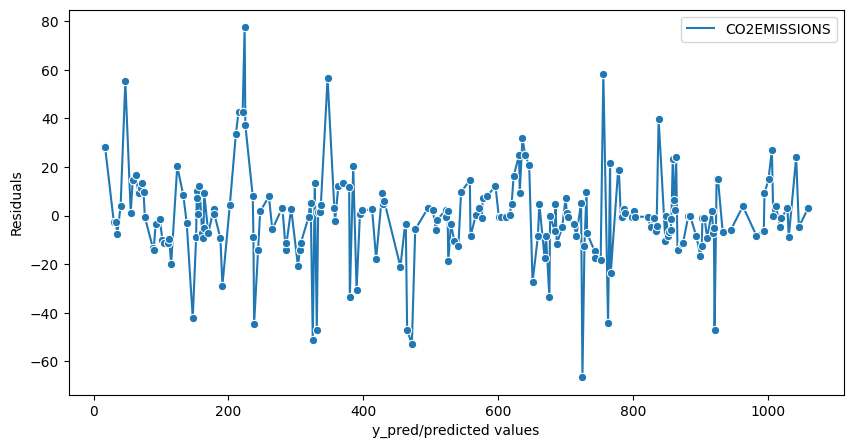

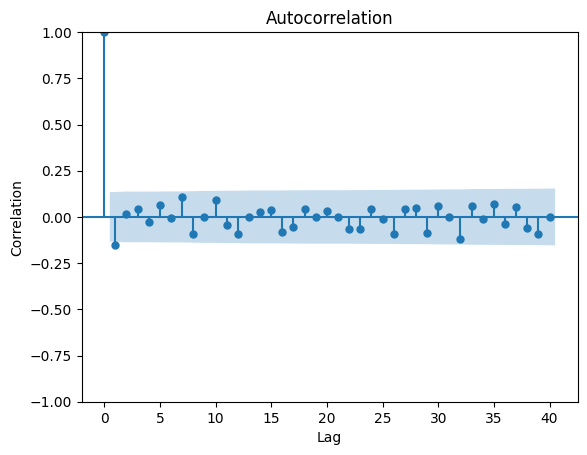

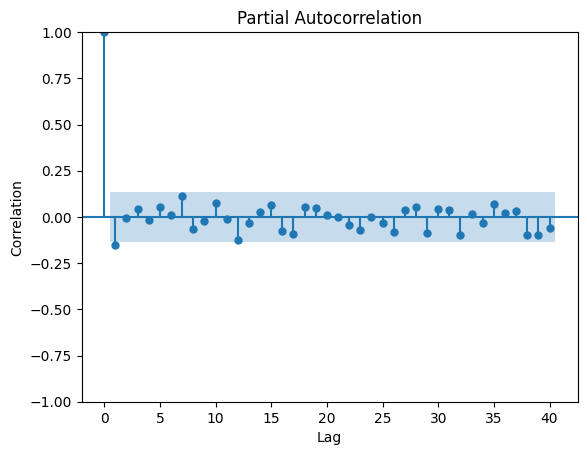

In [16]:
# Book Figure 11-14

import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
import matplotlib.pyplot as plot

plot.figure(figsize=(10,5))
p = sns.lineplot(residual,marker='o',color='blue')
plot.xlabel('y_pred/predicted values')
plot.ylabel('Residuals')
print('ljungbox stat:', sm.stats.acorr_ljungbox(residual, lags=[40], return_df=True))
dw_statistic = durbin_watson(residual)
print('Durbin-Watson stat:',dw_statistic)
if dw_statistic < 1.5:
    print("The residuals are negatively correlated.")
elif dw_statistic > 2.5:
    print("The residuals are positively correlated.")
else:
    print("The residuals are not correlated.")
sm.graphics.tsa.plot_acf(residual, lags=40)
plot.xlabel('Lag')
plot.ylabel('Correlation')
plot.show()
sm.graphics.tsa.plot_pacf(residual, lags=40)
plot.xlabel('Lag')
plot.ylabel('Correlation')
plot.show()

Influencial data

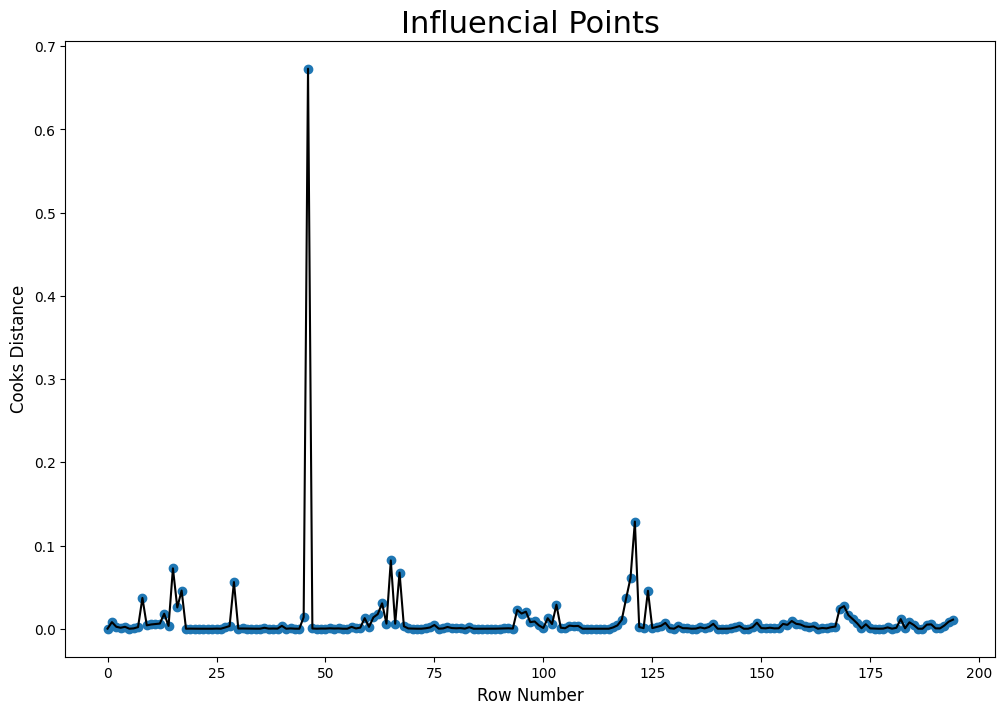

In [18]:
import statsmodels.api as sm

filename = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
"drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
"num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
"peak-rpm","city-mpg","highway-mpg","price"]

df = pd.read_csv(filename, names = headers)

df = df.loc[:, ['symboling', 'wheel-base', 'engine-size', 'bore', 'stroke',
'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
'highway-mpg', 'price']]
df = df.replace('?', np.nan)
df = df.dropna()
df.reset_index(drop = True, inplace = True)

#define response variable
y = df['price']

#define explanatory variable
x = df[['symboling', 'wheel-base', 'engine-size', 'bore', 'stroke',
'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
'highway-mpg']]

import statsmodels.api as sm

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y.astype(float), x.astype(float)).fit()

import numpy as np
np.set_printoptions(suppress=True)

#create instance of influence
influence = model.get_influence()
cooks = influence.cooks_distance

# Draw plot
plt.figure(figsize = (12, 8))
plt.scatter(df.index, cooks[0])
plt.plot(df.index, cooks[0], color='black')
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Cooks Distance', fontsize = 12)
plt.title('Influencial Points', fontsize = 22)
plt.show()

Variable correlation

In [ ]:
# Book Figure 11-5

import matplotlib.pyplot as plot
df.plot.scatter(x='ENGINESIZE', y='CO2EMISSIONS')
df.plot.scatter(x='CYLINDERS', y='CO2EMISSIONS')
df.plot.scatter(x='FUELCONSUMPTION_COMB_MPG', y='CO2EMISSIONS')

Multi-colinearity

In [ ]:
# Book Figure 11-7

from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns

vif=[]
for i in range (X_train.shape[1]):
  vif.append(variance_inflation_factor(X_train, i))
pd.DataFrame({'vif':vif}, index=X.columns[0:3]).T
print('VIF of [ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB_MPG]:', vif)
sns.heatmap(X.iloc[:,0:3].corr(),annot=True)

Heteroscedasticity

In [ ]:
# Book Figure 11-13

import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import matplotlib.pyplot as plot
import statsmodels.api as sm

plot.scatter(y_pred,residual)
plot.xlabel('y_pred')
plot.ylabel('Residual')
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, X_test)
print ('Goldfeld-Quandt:', lzip(name, test))
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
white_test = sm.stats.diagnostic.het_white(results.resid, results.model.exog)
print("White test statistic:", white_test[0])
print("White test p-value:", white_test[1])

Autocorrelation

ljungbox stat:       lb_stat  lb_pvalue
40  37.739576   0.572471
Durbin-Watson stat: [2.2469908]
The residuals are not correlated.


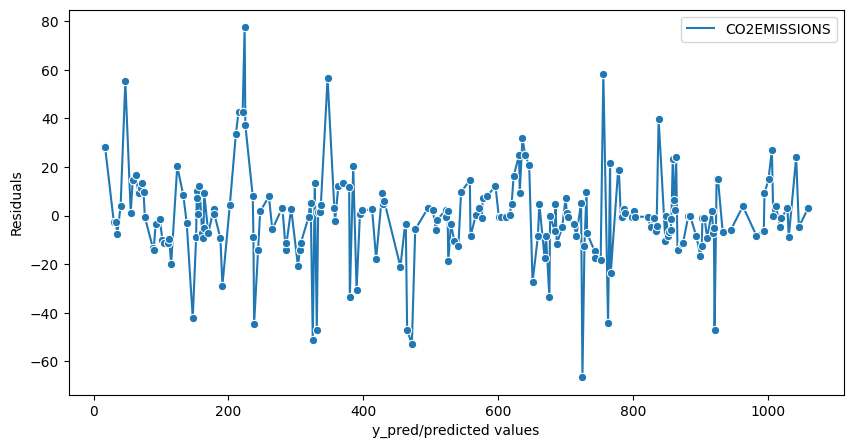

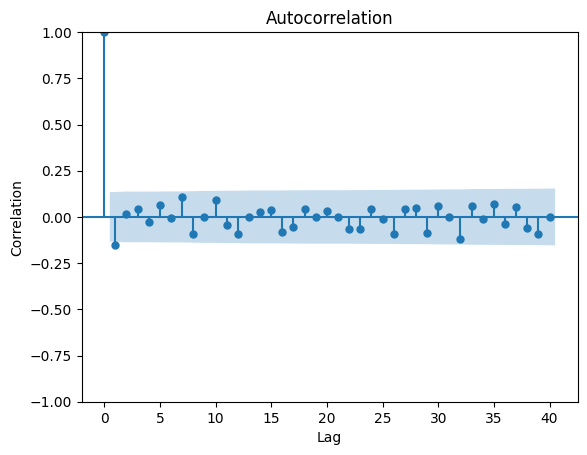

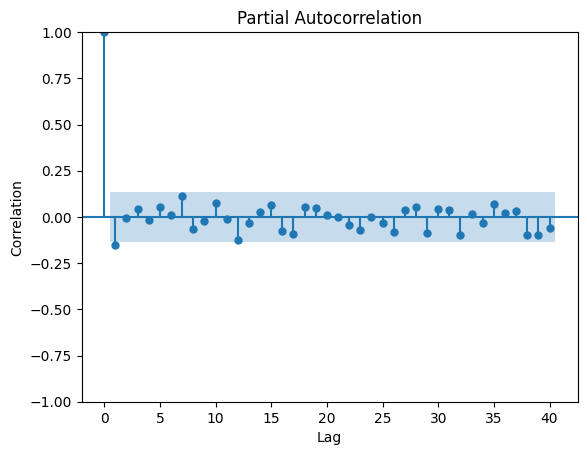

In [ ]:
# Book Figure 11-14

import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
import matplotlib.pyplot as plot

plot.figure(figsize=(10,5))
p = sns.lineplot(residual,marker='o',color='blue')
plot.xlabel('y_pred/predicted values')
plot.ylabel('Residuals')
print('ljungbox stat:', sm.stats.acorr_ljungbox(residual, lags=[40], return_df=True))
dw_statistic = durbin_watson(residual)
print('Durbin-Watson stat:',dw_statistic)
if dw_statistic < 1.5:
    print("The residuals are negatively correlated.")
elif dw_statistic > 2.5:
    print("The residuals are positively correlated.")
else:
    print("The residuals are not correlated.")
sm.graphics.tsa.plot_acf(residual, lags=40)
plot.xlabel('Lag')
plot.ylabel('Correlation')
plot.show()
sm.graphics.tsa.plot_pacf(residual, lags=40)
plot.xlabel('Lag')
plot.ylabel('Correlation')
plot.show()